In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [24]:
data = pd.read_excel(r'LiptonData.xlsx')

In [67]:
data['5.Nationality'] = data['5.Nationality'].str.strip()
data['5.Nationality'] = data['5.Nationality'].str.capitalize()
data['5.Nationality'] = data['5.Nationality'].replace('Română', 'Romanian')
data['5.Nationality'] = data['5.Nationality'].replace('Român', 'Romanian')
data['5.Nationality'] = data['5.Nationality'].replace('Romania', 'Romanian')
data['5.Nationality'] = data['5.Nationality'].replace('român', 'Romanian')
data['5.Nationality'] = data['5.Nationality'].replace('Romana', 'Romanian')
data['5.Nationality'] = data['5.Nationality'].replace('France', 'French')
data['5.Nationality'] = data['5.Nationality'].replace('Nan', None)
data['5.Nationality'] = data['5.Nationality'].replace('nan', None)
data = data.dropna(subset=['5.Nationality'])

data['5.Nationality'] = data['5.Nationality'][data['5.Nationality'] != 'Gypsy']
data['5.Nationality'] = data['5.Nationality'][data['5.Nationality'] != 'What']

data['5.Nationality'] = data['5.Nationality'].astype(str)

data.at[data.index[6], '10.What are some factors that would cause you to switch from one brand of Ice Tea to another?'] = 'Anything'

nationalities = data['5.Nationality'].unique()
nationalities.sort()

print('The nationalities present in the dataset are:\n')
for nationality in nationalities:
    print(nationality)


The nationalities present in the dataset are:

British
Bulgarian
Denmark
Dutch
French
German
Italian
Latvian
Lithuanian
Norwegian
Polish
Portuguese
Romanian
Spanish


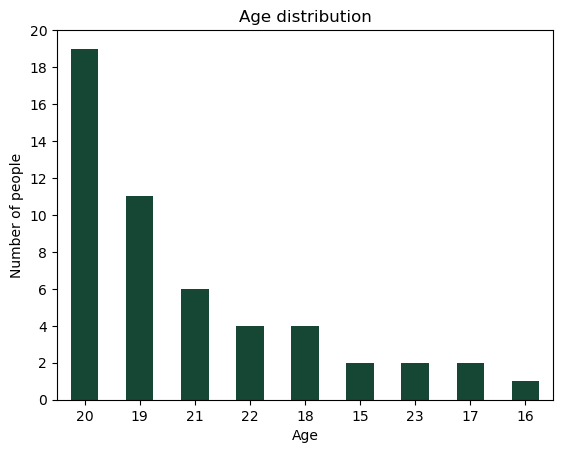

In [68]:
fig, ax = plt.subplots()

data['2.Age'].value_counts().plot(kind='bar', color='#154734')
data['2.Age'] = data['2.Age'].replace(230, None)
data = data.dropna(subset=['2.Age'])

ax.set_title('Age distribution')
ax.set_xlabel('Age')
plt.xticks(rotation=0)
ax.set_ylabel('Number of people')

ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

plt.show()

    Most of the participants in the survey were 20 years.

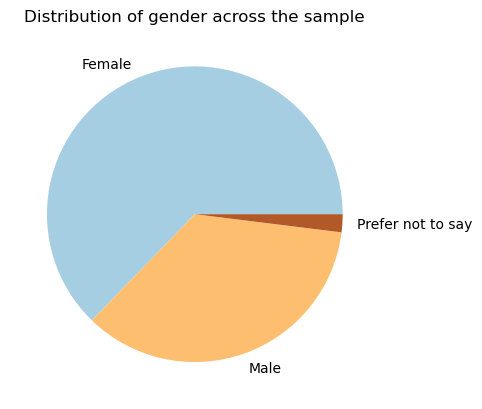

In [35]:
data['4.Gender'].value_counts().plot(kind='pie', colormap='Paired')

plt.title('Distribution of gender across the sample')
plt.ylabel('')

plt.show()

In [36]:
females = data[data['4.Gender'] == 'Female']['4.Gender'].count()/len(data)*100
males = data[data['4.Gender'] == 'Male']['4.Gender'].count()/len(data)*100
unspecified = data[data['4.Gender'] == 'Prefer not to say']['4.Gender'].count()/len(data)*100

print('Females are represented by {:.2f}%, while males have {:.2f}% and the rest of {:.2f}% did not specify their gender.'.format(females, males, unspecified))


Females are represented by 62.75%, while males have 35.29% and the rest of 1.96% did not specify their gender.


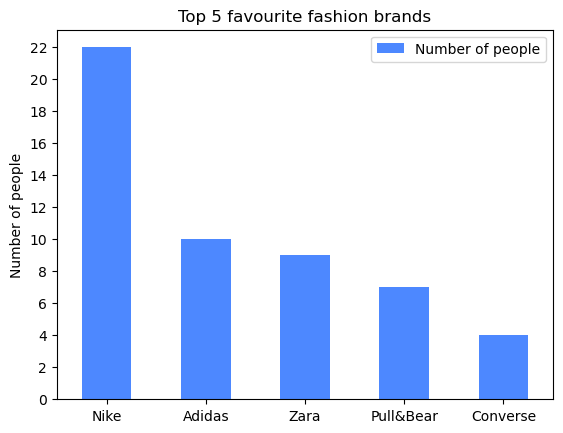

In [50]:
data['11.What are your favourite fashion brands?'].str.strip()
data = data.dropna(subset=['11.What are your favourite fashion brands?'])

data['11.What are your favourite fashion brands?'].replace('Nilke', 'Nike', inplace=True)

brand_dict = {}

for brands in data['11.What are your favourite fashion brands?']:
    brands = brands.split(',')
    for brand in brands:
        brand = brand.strip()
        if brand in brand_dict:
            brand_dict[brand] += 1
        else:
            brand_dict[brand] = 1

brand_dict = dict(sorted(brand_dict.items(), key=lambda item: item[1], reverse=True))
brand_df = pd.DataFrame(brand_dict.items(), columns=['Brand', 'Number of people'])

brand_df.head().plot(kind='bar',x='Brand', y='Number of people', color='#4D88FF')

plt.title('Top 5 favourite fashion brands')
plt.ylabel('Number of people')
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.xticks(rotation=0)
plt.xlabel('')

plt.show()

    Nike is the most popular brand among Gen Z.

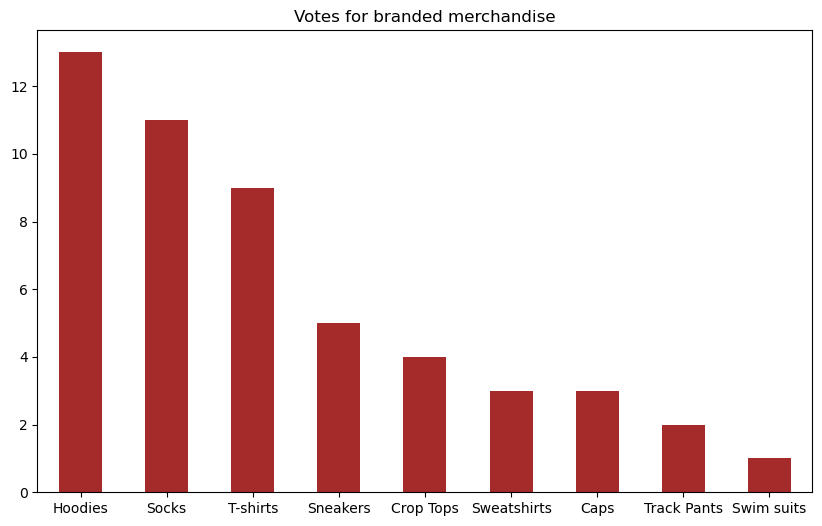

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

data['13.What type of branded merchandise would you like to see?'].str.strip()

data['13.What type of branded merchandise would you like to see?'].value_counts().plot(kind='bar', color='brown')

plt.xticks(rotation=0)
plt.xlabel('Merch type')
ax.xaxis.label.set_visible(False)
plt.title('Votes for branded merchandise')

plt.show()

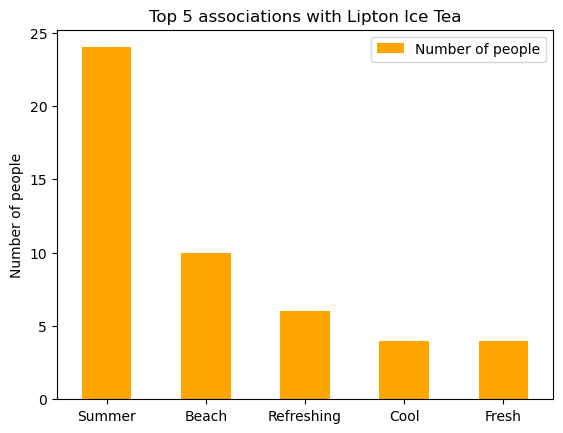

In [53]:
data['14.What do you associate Lipton Ice Tea with? \n'].str.strip()

words_dict = {}

for words in data['14.What do you associate Lipton Ice Tea with? \n']:
    words = words.split(',')
    for word in words:
        word = word.strip()
        word = word.capitalize()
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1

words_dict = dict(sorted(words_dict.items(), key=lambda item: item[1], reverse=True))
words_df = pd.DataFrame(words_dict.items(), columns=['Word', 'Number of people'])

words_df.head().plot(kind='bar', x='Word', y='Number of people', color='orange')

plt.title('Top 5 associations with Lipton Ice Tea')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.xlabel('')

plt.show()


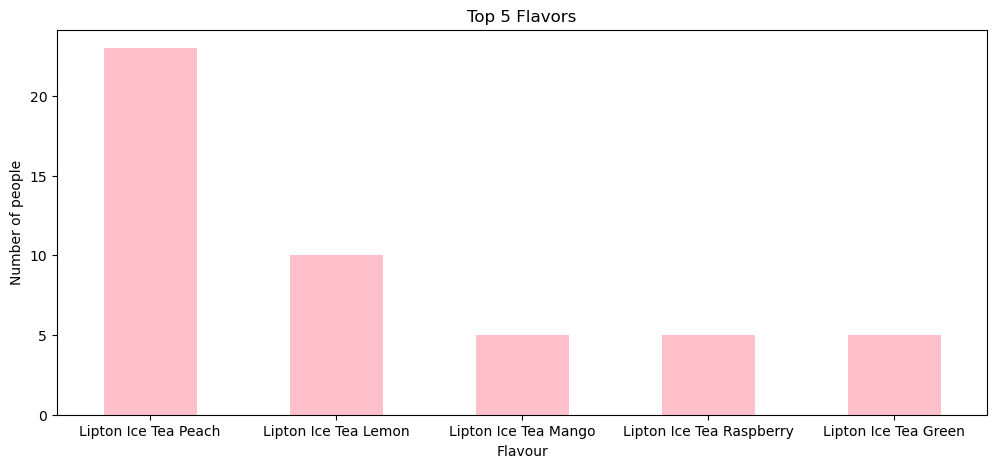

In [66]:
top_flavors = data['9.If you purchase, what is your favourite flavour?\n'].value_counts().nlargest(5)

fig, ax = plt.subplots(figsize=(12, 5))
top_flavors.plot(kind='bar', color='pink')

plt.title('Top 5 Flavors')
plt.xlabel('Flavour')
plt.ylabel('Number of people')
plt.xticks(rotation=0)

plt.show()
